## 개념 정리
### 용어 정리
- 로지스틱 회귀: 선형 방정식을 활용한 분류 알고리즘. 시그모이드 함수와 소프트맥스 함수를 사용함
- 다중 분류: 타깃 클래스가 2개 이상인 분류 문제. 이진 분류에는 시그모이드 함수를, 다중 분류에는 소프트맥스 함수를 사용함
- 시그모이드 함수: 선형 방정식의 출력을 0~1로 압축함
- 소프트맥스 함수: 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 함.

### 핵심 패키지와 함수 (sklearn)
- LogisticRegression
    - 로지스틱 회귀를 위한 클래스
    - solver: 사용할 알고리즘을 선택. 기본값은 'lbfgs'. 'sag'는 특성과 샘플 수가 많을 수록 성능이 좋음. 'saga'도 있음
    - penalty: L2규제(릿지방식), L1규제(라쏘방식)을 선택할 수 있음. 기본값은 l2.
    - C: 규제의 강도를 제어함. 값이 작을 수록 규제가 작아짐. (기본값 1.0)
- predict_proba()
    - 이진분류: 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환
    - 다중분류: 샘플마다 모든 클래스에 대한 확률을 반환
- decision_function()
    - 이진분류: 양성 클래스의 확률이 반환됨. 이 값이 0보다 크면 양성 클래스로 예측
    - 다중분류: 각 클래스마다 선형 방정식을 계산. 가장 큰 값의 클래스가 예측 클래스가 됨.

In [8]:
'''데이터 불러오고, 편집하기'''
# Pandas를 이용해 데이터 불러오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
# Species 열에서 고유한 값 추출하기
print(pd.unique(fish['Species']))

# 훈련셋 만들기
fish_input = fish[['Weight',"Length","Diagonal","Height","Width"]].to_numpy()
print(fish_input[:5])
# 타겟 만들기
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

# 훈련데이터셋과 테스트데이터셋을 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 훈련셋과 테스트셋을 표준화 전처리
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(train_input)
train_scaled = SS.transform(train_input)
test_scaled = SS.transform(test_input)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [10]:
# 다중 분류: 타깃 데이터에 여러 클래스(정답지)가 포함된 문제
# K-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(train_scaled, train_target)
print("Train:", KN.score(train_scaled, train_target))
print("Test:", KN.score(test_scaled, test_target))
# 정렬된 타깃값을 볼 수 있음
print("Classes:",KN.classes_)
# SKlearn에서는 문자열로 된 타깃값을 사용함. 따라서, 예측에 대한 출력도 문자열로 나타남.
print(KN.predict(test_scaled[:5]))

# 어떤 확률로 예측되었는지 알아보기
import numpy as np
proba = KN.predict_proba(train_scaled[:5]) # 주어진 데이터에서 어떤 클래스에 가까운지 보여줌
print(np.round(proba, decimals=4)) # 소수점 4번째 자리까지 잘라줌
# 모델이 계산한 확률이 가까운 이웃의 비율과 맞는지 확인
distances, indexes = KN.kneighbors(test_scaled[3:4])
print(train_target[indexes])

Train: 0.8907563025210085
Test: 0.85
Classes: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.    ]]
[['Roach' 'Perch' 'Perch']]


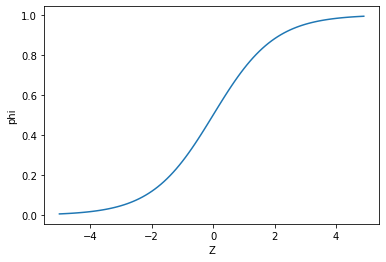

In [11]:
'''시그모이드 그래프 만들기'''
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('Z')
plt.ylabel('phi')
plt.show()

In [12]:
'''로지스틱 회귀로 이진 분류 수행하기'''
# Boolean Indexing을 통해 값을 분리하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train_bream_smelt, target_bream_smelt)

# 모델에 대한 학습결과 확인하기
print("Prediction:",LR.predict(train_bream_smelt[:5])) # 5번째 원소까지의 예측값 출력
print("Prob:", LR.predict_proba(train_bream_smelt[:5])) # 5번째 원소까지의 예측확률 출력
print("Output classes in expectation",LR.classes_) # 예측모델에서 나오는 클래스 확인
print("Parameter:",LR.coef_, LR.intercept_) # 모델을 통해 나온 계수/파라미터

# 샘플에 대한 선형방정식의 출력값을 출력해줌 (모델의 z값에 해당)
decisions = LR.decision_function(train_bream_smelt[:5])
print("Z-value:",decisions)

# 위에서 구한 값을 시그모이드에 대입하여, 확률을 구할 수 있음
from scipy.special import expit
print("Positive Prob:",expit(decisions))

Prediction: ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
Prob: [[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
Output classes in expectation ['Bream' 'Smelt']
Parameter: [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
Z-value: [-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
Positive Prob: [0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [27]:
'''로지스틱 회귀로 다중 분류 수행하기'''
LR = LogisticRegression(C = 20, max_iter=1000) # C가 작을 수록 규제가 커지고, max_iter는 반복횟수를 설정한다.
LR.fit(train_scaled, train_target)
print("Train Score:",LR.score(train_scaled, train_target))
print("Test Score:",LR.score(test_scaled, test_target))

# Test Set으로 예측하고, 확률값 구하기
print("Predict:",LR.predict(test_scaled[:5]))
proba = LR.predict_proba(test_scaled[:5])
print("Proba:",np.round(proba, decimals=3))
print("Classes",LR.classes_)
print("Parameter:",LR.coef_,LR.intercept_) # 각 클래스 별로 가지고 있는 파라미터값을 출력함.

# 샘플에 대한 선형방정식의 출력값을 출력해줌 (모델의 z값에 해당)
decision = LR.decision_function(test_scaled[:5])
print("Z-Value",np.round(decision, decimals=2))

# 위에서 구한 값을 소프트맥스에 적용하면, 확률을 구할 수 있음
from scipy.special import softmax
proba = softmax(decision, axis=1)
print("Prob",np.round(proba, decimals=3))

Train Score: 0.9327731092436975
Test Score: 0.925
Predict: ['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
Proba: [[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
Classes ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
Parameter: [[-1.48987947 -1.02990953  2.5943557   7.70317343 -1.20033025]
 [ 0.19634548 -2.00943128 -3.78042862  6.50475259 -1.99514569]
 [ 3.56251132  6.3440727  -8.49003186 -5.75747072  3.79323642]
 [-0.10502282  3.60283339  3.9306439  -3.61704937 -1.75100047]
 [-1.40029234 -6.0752909   5.25937899 -0.87225852  1.86066972]
 [-1.3853437   1.49231097  1.39234242 -5.67722595 -4.40100291]
 [ 0.62168152 -2.32458536 -0.90626054  1.71607854  3.69357318]] [-0.09215467 -0.26294938  3.25077434 -0.14657892  2.65465827 -6.78789762
  1.38414798]
Z-Value [[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.6